## Project 4:  Solving N-Queens Problem using Genetic Algorithms

#### CSC 180  Intelligent Systems

#### Dr. Haiquan Chen, California State University, Sacramento


In [ ]:
# Insert your name, your id, course title, assignment id, and due date here as comment 

# Project 4

# Due 11/20/2020

# Ashlei McMath 219198396

# Jessica Garcia 214535127

# Cristian Romo 218999054


## Part I: Position-index-based board representation

In [ ]:
!pip install deap

     |████████████████████████████████| 163kB 5.6MB/s 


In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


In [ ]:
def create_individual():
    return random.sample(range(64), 8)

In [ ]:
print(create_individual())

[58, 54, 13, 56, 52, 12, 55, 47]


In [ ]:
#
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[60, 26, 47, 11, 59, 0, 63, 48]


In [ ]:
show_grid(pop[0])

X|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|X|-|-|X|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which returns the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board.   ***Give each duplicate a high penalty (i.e., multiply by 20, 50) and add the penalty to the fitness value.*** 

-  evaFitness() returns the total number of duplicate position pair (with penalty) plus the total number of distinct pairs of queens that attack each other.  

In [ ]:
#fitness function
def evaFitness(individual):
    

  conflict = 0
    # calculate row and column conflict
    # just subtract the unique length of array from total length of array
    # [1,1,1,2,2,2] - [1,2] => 4 clashes



  row_col_conflict = abs(len(individual) - len(np.unique(individual)))
  conflict += row_col_conflict

  # calculate diagonal clashes
  for i in range(len(individual)):
      for j in range(len(individual)):
          if ( i != j):
              dx = abs(i-j)
              dy = abs(individual[i] - individual[j])
              if(dx == dy):
                  conflict += 1
   
  return (checkDuplicate(individual) + conflict,)
    
# Calculate the number of queen pairs in the same position for any given board

def checkDuplicate(individual):
  dup = 0
  x =0 
  dup = len(individual) - len(set(individual))
  if (dup > 0):
    x = 10000
  return x
  
  #for index in range(len(individual): 
        #if index!=0: # check only from 2nd element onwards
              #item = my_list[index] # get the current item
                #if item in my_list[:index]: # check if current item is in the beginning of the list uptill the current element
                  #dup +=1
                        
    #return dup
    
#evaFitness([7, 5, 2, 4, 3, 1, 3, 5])
#evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) 

### 5 pts:  Write your code in the cell below to register "evaluate" function to toolbox

In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 1, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [ ]:
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:
# Lab 13 Genetic Agorithm

pop = toolbox.population(n=50)

hof = tools.HallOfFame(maxsize=1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                                   stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg 	min	max
0  	50    	1.84	0  	6  
1  	35    	1201	0  	10003
2  	28    	200.42	0  	10001
3  	30    	1600.28	0  	10003
4  	21    	400.12 	0  	10003
5  	28    	1400.38	0  	10003
6  	24    	400.4  	0  	10005
7  	37    	800.46 	0  	10004
8  	25    	1000.26	0  	10003
9  	31    	600.28 	0  	10002
10 	32    	600.32 	0  	10002
11 	39    	1200.44	0  	10003
12 	29    	1000.26	0  	10003
13 	33    	600.52 	0  	10003
14 	38    	800.2  	0  	10001
15 	33    	1000.42	0  	10005
16 	33    	1400.5 	0  	10005
17 	22    	600.26 	0  	10001
18 	32    	800.28 	0  	10003
19 	31    	600.46 	0  	10003
20 	32    	200.14 	0  	10001
21 	28    	1200.16	0  	10001
22 	34    	400.12 	0  	10001
23 	32    	200.42 	0  	10001
24 	28    	800.16 	0  	10003
25 	33    	400.2  	0  	10001
26 	28    	200.06 	0  	10003
27 	40    	400.28 	0  	10001
28 	32    	1000.18	0  	10003
29 	33    	200.18 	0  	10003
30 	24    	400.16 	0  	10003
31 	25    	200.06 	0  	10001
32 	26    	400.24 	0  	10001
33 	24    	200.1  	0  	10001

### 5 pts:  Plot the "avg" and "min" for each generation

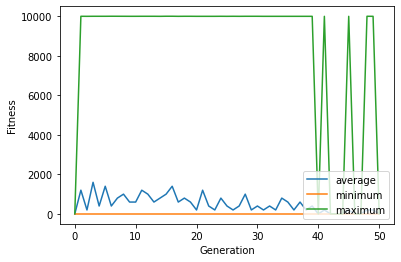

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Lab 13 Genetic Agorithm

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()


### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:
# Lab 13 Genetic Algorithm

print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)

print()
print("Last Generation:")
for n in range(10):
  print(pop[n], pop[n].fitness.values)

  
print("Chessboard\n")
show_grid(pop[0])


Best individual is:  [59, 38, 11, 42, 40, 51, 49, 31]

with fitness:  (0.0,)

Last Generation:
[4, 61, 40, 44, 53, 38, 13, 10] (0.0,)
[4, 61, 40, 44, 53, 38, 13, 10] (0.0,)
[6, 63, 40, 20, 50, 38, 13, 10] (0.0,)
[34, 61, 40, 18, 25, 38, 13, 10] (0.0,)
[6, 61, 24, 21, 3, 38, 13, 27] (0.0,)
[6, 61, 40, 44, 50, 38, 13, 10] (0.0,)
[34, 61, 40, 21, 53, 38, 13, 10] (0.0,)
[4, 61, 40, 44, 50, 38, 13, 10] (0.0,)
[39, 61, 40, 18, 50, 38, 13, 54] (0.0,)
[6, 61, 40, 44, 50, 38, 13, 10] (0.0,)
Chessboard

-|-|-|-|X|-|-|-|
----------------
-|-|X|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
X|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------


## Part II: Row-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [ ]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [ ]:
toolbox.individual()

[4, 6, 4, 6, 1, 4, 7, 0]

In [ ]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[3, 7, 5, 2, 0, 0, 0, 0]


In [ ]:
show_grid(pop[0])

-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [ ]:
#fitness function
def evaFitness(individual):
  

  conflict = 0
    # calculate row and column conflict
    # just subtract the unique length of array from total length of array
    # [1,1,1,2,2,2] - [1,2] => 4 clashes
  #x = [0 for n in range(8)] #added in to verify evaFitness was working
  #for i in range(8):
    #x[i] = individual[i] % 8
  #print(x)
  row_col_conflict = abs(len(individual) - len(np.unique(individual)))
  conflict += row_col_conflict

  # calculate diagonal clashes
  for i in range(len(individual)):
      for j in range(len(individual)):
          if ( i != j):
              dx = abs(i-j)
              dy = abs(individual[i] - individual[j])
              if(dx == dy):
                  conflict += 1
   
  return (checkDuplicate(individual) + conflict,)
    
# Calculate the number of queen pairs in the same position for any given board

def checkDuplicate(individual):
  dup = 0
  x =0 
  dup = len(individual) - len(set(individual))
  if (dup > 0):
    x = 10000 
  return x
  
  #for index in range(len(individual): 
    #if index!=0: # check only from 2nd element onwards
      #item = my_list[index] # get the current item
      #if item in my_list[:index]: # check if current item is in the beginning of the list uptill the current element
       # dup +=1
                        
#return dup
#testing evaFitness    
   

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:
# Lab 13 Genetic ALgorithm

toolbox.register("evaluate", evaFitness)

In [ ]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)


### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:
# Lab 13 Genetic Algorithm

pop = toolbox.population(n=100)

hof = tools.HallOfFame(maxsize=1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, 
                                   stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg    	min	max  
0  	100   	9911.76	12 	10022
1  	64    	9709.5 	8  	10017
2  	54    	9807.91	12 	10016
3  	62    	9707.62	12 	10018
4  	52    	9806.26	4  	10013
5  	70    	9706.41	4  	10017
6  	65    	9805.57	4  	10013
7  	54    	9604.76	4  	10015
8  	66    	9203.93	4  	10012
9  	52    	8103.53	4  	10012
10 	64    	6504.86	4  	10014
11 	50    	4304.33	4  	10013
12 	63    	1904.42	4  	10017
13 	51    	604.26 	4  	10013
14 	62    	404.11 	4  	10010
15 	53    	1104.26	4  	10012
16 	55    	504.1  	4  	10011
17 	67    	1804.52	4  	10011
18 	61    	1404.32	4  	10012
19 	61    	904.23 	4  	10011
20 	61    	904.26 	4  	10011
21 	59    	1204.56	4  	10013
22 	61    	1004.41	4  	10011
23 	59    	804.17 	4  	10007
24 	52    	604.19 	4  	10011
25 	62    	1004.43	4  	10013
26 	51    	904.24 	4  	10011
27 	63    	704.27 	4  	10013
28 	55    	1204.34	4  	10010
29 	68    	1104.35	4  	10011
30 	60    	1104.34	4  	10013
31 	66    	1304.47	4  	10016
32 	50    	1104.4 	4  	10012
33 	74    	140

### 5 pts:  Plot the "avg" and "min" for each generation

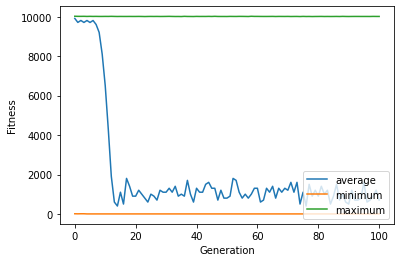

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

# Lab 13 Genetic Agorithm

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:
# Lab 13 Genetic Algorithm

print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)

print()
print("Chessboard\n")
show_grid(pop[0])


Best individual is:  [6, 1, 2, 0, 3, 4, 7, 5]

with fitness:  (4.0,)

Chessboard

-|-|-|-|-|-|X|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|X|-|-|
----------------


### Reflection:  Which board representaion is better in terms of ease of coding and final solution quality?   Try different parameter values for mutation and crossover and vary the number of generations and the population size.  Write your findings in the report.        

***16X16 board***

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
def create_individual():
    return random.sample(range(256), 16)

In [ ]:
print(create_individual())

[242, 201, 22, 225, 109, 103, 59, 126, 182, 178, 90, 243, 139, 60, 65, 9]


In [ ]:
def show_grid(board):
    
    n = [0]*256
    for i in board:
        n[i] = 1
    
    
    for i in range(16):
        for j in range(256):
            if j // 16 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("--------------------------------")


In [ ]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[36, 172, 35, 160, 219, 150, 72, 107, 4, 115, 181, 21, 85, 162, 191, 129]


In [ ]:
show_grid(pop[0])

-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|X|X|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|
--------------------------------
-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|
--------------------------------
X|-|X|-|-|-|-|-|-|-|-|-|X|-|-|-|
--------------------------------
-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|X|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|

In [ ]:
#fitness function
def evaFitness(individual):

  conflict = 0
    # calculate row and column conflict
    # just subtract the unique length of array from total length of array
    # [1,1,1,2,2,2] - [1,2] => 4 clashes



  row_col_conflict = abs(len(individual) - len(np.unique(individual)))
  conflict += row_col_conflict

  # calculate diagonal clashes
  for i in range(len(individual)):
      for j in range(len(individual)):
          if ( i != j):
              dx = abs(i-j)
              dy = abs(individual[i] - individual[j])
              if(dx == dy):
                  conflict += 1
   
  return (checkDuplicate(individual) + conflict,)
    
# Calculate the number of queen pairs in the same position for any given board

def checkDuplicate(individual):
  dup = 0
  x =0 
  dup = len(individual) - len(set(individual))
  if (dup > 0):
    x = 10000
  return x
  
  #for index in range(len(individual): 
        #if index!=0: # check only from 2nd element onwards
              #item = my_list[index] # get the current item
                #if item in my_list[:index]: # check if current item is in the beginning of the list uptill the current element
                  #dup +=1
                        
    #return dup
    
#evaFitness([7, 5, 2, 4, 3, 1, 3, 5])
#evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) 

In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 1, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [ ]:
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

In [ ]:
# Lab 13 Genetic Agorithm

pop = toolbox.population(n=50)

hof = tools.HallOfFame(maxsize=1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                                   stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg 	min	max
0  	50    	1.56	0  	4  
1  	29    	600.62	0  	10001
2  	29    	400.52	0  	10003
3  	24    	600.42	0  	10005
4  	26    	1200.2	0  	10001
5  	37    	600.54	0  	10003
6  	32    	800.24	0  	10001
7  	27    	1000.38	0  	10002
8  	32    	1200.18	0  	10002
9  	25    	1200.32	0  	10003
10 	32    	1000.18	0  	10001
11 	27    	200.14 	0  	10001
12 	31    	1000.2 	0  	10003
13 	29    	1000.22	0  	10001
14 	28    	1000.3 	0  	10001
15 	28    	200.1  	0  	10001
16 	27    	400.2  	0  	10005
17 	37    	800.28 	0  	10001
18 	27    	0.08   	0  	2    
19 	28    	200.22 	0  	10001
20 	29    	600.34 	0  	10009
21 	33    	600.26 	0  	10003
22 	28    	0.32   	0  	4    
23 	32    	400.12 	0  	10003
24 	17    	200.18 	0  	10001
25 	25    	200.22 	0  	10001
26 	29    	200.18 	0  	10003
27 	25    	400.3  	0  	10004
28 	31    	400.32 	0  	10003
29 	23    	200.02 	0  	10001
30 	28    	400.24 	0  	10003
31 	26    	600.28 	0  	10004
32 	27    	0.28   	0  	4    
33 	25    	200.26 	0  	10003
3

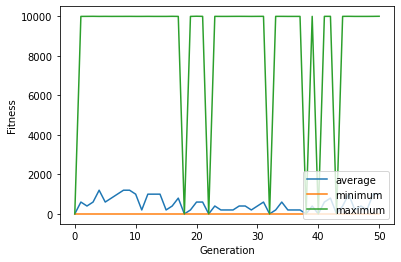

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Lab 13 Genetic Agorithm

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Lab 13 Genetic Algorithm

print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)

print()
print("Last Generation:")
for n in range(10):
  print(pop[n], pop[n].fitness.values)

  
print("Chessboard\n")
show_grid(pop[0])


Best individual is:  [118, 133, 204, 144, 190, 234, 0, 38, 12, 158, 177, 19, 24, 143, 152, 67]

with fitness:  (0.0,)

Last Generation:
[27, 252, 130, 244, 39, 115, 50, 198, 45, 112, 255, 60, 51, 24, 200, 66] (0.0,)
[27, 252, 170, 244, 85, 115, 50, 198, 26, 112, 255, 60, 239, 24, 200, 66] (0.0,)
[30, 252, 170, 4, 14, 43, 39, 32, 98, 158, 255, 48, 8, 24, 200, 66] (0.0,)
[30, 252, 170, 4, 14, 43, 39, 32, 98, 158, 255, 48, 8, 24, 200, 66] (0.0,)
[30, 252, 170, 4, 85, 115, 39, 32, 98, 158, 255, 48, 51, 24, 200, 66] (0.0,)
[27, 252, 170, 244, 37, 115, 231, 7, 1, 158, 255, 42, 239, 24, 200, 66] (0.0,)
[27, 252, 170, 244, 85, 115, 231, 7, 1, 158, 255, 42, 239, 24, 200, 66] (0.0,)
[27, 252, 130, 244, 37, 115, 50, 198, 45, 112, 255, 60, 51, 24, 200, 66] (0.0,)
[27, 252, 130, 6, 42, 6, 50, 32, 98, 55, 15, 41, 239, 24, 200, 66] (10001.0,)
[27, 252, 170, 244, 48, 115, 231, 32, 98, 158, 255, 42, 239, 24, 200, 66] (0.0,)
Chessboard

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 15)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=16)

In [ ]:
toolbox.individual()

[2, 4, 14, 7, 13, 8, 14, 11, 13, 14, 4, 7, 10, 15, 3, 9]

In [ ]:
def show_grid(board):
    
    n = [0]*256
    
    for i in range(len(board)):
        n[board[i] + i*16] = 1
      
    
    for i in range(16):
        for j in range(256):
            if j // 16 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("--------------------------------")


In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[0, 0, 15, 13, 1, 12, 6, 1, 11, 0, 9, 9, 7, 1, 1, 15]


In [ ]:
show_grid(pop[0])

X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|
--------------------------------
-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|
--------------------------------
-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|
--------------------------------
-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|
--------------------------------
X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|
--------------------------------
-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|

In [ ]:
#fitness function
def evaFitness(individual):
    
  conflict = 0
    # calculate row and column conflict
    # just subtract the unique length of array from total length of array
    # [1,1,1,2,2,2] - [1,2] => 4 clashes
  #x = [0 for n in range(8)] #added in to verify evaFitness was working
  #for i in range(8):
    #x[i] = individual[i] % 8
  #print(x)
  row_col_conflict = abs(len(individual) - len(np.unique(individual)))
  conflict += row_col_conflict

  # calculate diagonal clashes
  for i in range(len(individual)):
      for j in range(len(individual)):
          if ( i != j):
              dx = abs(i-j)
              dy = abs(individual[i] - individual[j])
              if(dx == dy):
                  conflict += 1
   
  return (checkDuplicate(individual) + conflict,)
    
# Calculate the number of queen pairs in the same position for any given board

def checkDuplicate(individual):
  dup = 0
  x =0 
  dup = len(individual) - len(set(individual))
  if (dup > 0):
    x = 10000 
  return x
  
  #for index in range(len(individual): 
    #if index!=0: # check only from 2nd element onwards
      #item = my_list[index] # get the current item
      #if item in my_list[:index]: # check if current item is in the beginning of the list uptill the current element
       # dup +=1
                        
#return dup
#testing evaFitness    
   

In [ ]:
# Lab 13 Genetic ALgorithm

toolbox.register("evaluate", evaFitness)

In [ ]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)


In [ ]:
# Lab 13 Genetic Algorithm

pop = toolbox.population(n=100)

hof = tools.HallOfFame(maxsize=1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, 
                                   stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg    	min  	max  
0  	100   	10024.3	10012	10038
1  	59    	10020.9	10012	10037
2  	67    	10019.3	10011	10036
3  	58    	10018.4	10011	10033
4  	64    	10017.9	10010	10031
5  	73    	10016.5	10010	10028
6  	57    	10015.9	10010	10027
7  	66    	10015.5	10009	10027
8  	58    	10014  	10008	10025
9  	54    	10012.7	10008	10025
10 	49    	10011.8	10006	10028
11 	62    	10011.6	10006	10023
12 	62    	10010  	10005	10024
13 	53    	10009  	10006	10018
14 	47    	10007.8	10005	10020
15 	73    	10007.5	10005	10019
16 	65    	10007.4	10005	10016
17 	67    	10007.6	10005	10026
18 	64    	10006.5	10005	10020
19 	65    	10006.3	10005	10016
20 	64    	10006  	10005	10015
21 	58    	10005.4	10005	10014
22 	53    	10005.8	10005	10016
23 	57    	10005.6	10005	10016
24 	67    	10005.9	10005	10018
25 	65    	10005.9	10005	10013
26 	67    	10006  	10005	10018
27 	63    	10005.9	10005	10013
28 	70    	10006.3	10005	10019
29 	66    	10005.7	10005	10014
30 	54    	10005.9	10005	10019
31 	67  

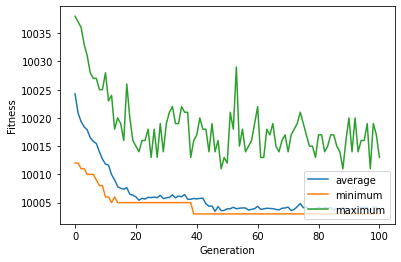

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

# Lab 13 Genetic Agorithm

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Lab 13 Genetic Algorithm

print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)

print()
print("Chessboard\n")
show_grid(pop[0])

Best individual is:  [3, 5, 13, 11, 14, 7, 1, 6, 0, 14, 11, 0, 8, 4, 2, 12]

with fitness:  (10003.0,)

Chessboard

-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|
--------------------------------
-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|
--------------------------------
-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|
--------------------------------
X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|
--------------------------------
-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|
--------------------------------
X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|
--------------------------------
-|-|-|-|X|-|-|-|-|-|-|-|-|